# 순차데이터와 순환신경망
지금까지 인공 신경망에 사용한 데이터는 각 샘플이 독립적인 경우다.  
이런 가정 덕분에 에포크마다 전체 샘플을 섞은 후 훈련이 가능했다.  

</br>


## 순차데이터


우리가 다루는 데이터 중에는 독립적이지 않고 샘플이 서로 연관된  
경우가 많다. 예를 들면 날씨 정보는 샘플이 서로 연관되어 있다.  
이렇게 일정 시간 간격을 배치된 데이터를 시계열 데이터라고 부른다.  

</br>

순서가 있는 데이터를 처리하기 위한 신경망이 순환 신경망이다.  


</br>

## 순환 신경망

뉴런의 출력이 순환 되는 신경망을 말한다.  
다음은 순환 신경망의 구조다.  




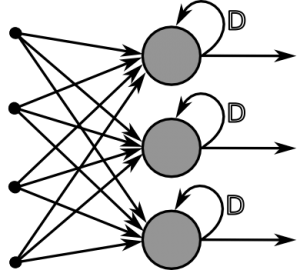

지금까지 보았던 것들과의 큰 차이점이 있으니  
그것은 출력이 다시 입력으로 들어간다는 점이다.  
이것을 순환 구조라고 부르며 이 구조가 있는 층을 순환층이라고 한다.  

</br>

순환 신경망에서는 뉴런을 셀이라고 부른다.  
뉴런마다 순환 구조를 표현하기 번거롭기 때문에 셀 하나에 순환 구조를  
나타내는 경우가 많다.

# 정뱡향 계산

순환층, 입력층, 출력층을 가진 아주 단순한 순환 신경망을 그림으로 나타내면  
다음과 같다.  

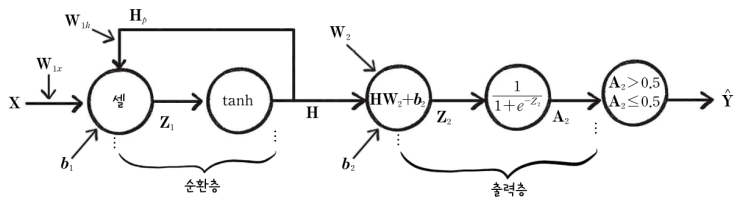

순환층의 정방향 계산은 아래와 같다.  

Z<sub>1</sub> = XW<sub>1x</sub> + H<sub>p</sub>W<sub>1h</sub> + b<sub>1</sub>  
H = tanh(z<sub>1</sub>)
  
출력층의 정방향 계산은 아래와 같다.  
  
Z<sub>2</sub> = HW<sub>2</sub> + b<sub>2</sub>  
A<sub>2</sub> = sigmoid(z<sub>2</sub>)

</br>
</br>
</br>

이제 정방향 계산에 필요한 입력과 가중치 구조를 알아보자  
입력에 곱해지는 가중치 W<sub>1x</sub>의 크기는 (<i>n<sub>f</sub>, n<sub>c</sub></i>)이다.  
여기서 <i>n<sub>c</sub></i>는 순환층에 있는 셀의 수다.  

</br>

입력데이터 X와 가중치 W<sub>1x</sub>를 곱한 값은 아래와 같다.  
XW<sub>1x</sub> =  (<i>m, n<sub>c</sub></i>)  

</br>

이전 은닉 상태인 H<sub>p</sub>의 크기도 (<i>m, n<sub>c</sub></i>)가 된다.  
H<sub>p</sub>W<sub>1h</sub> = (<i>m, n<sub>c</sub></i>)

</br>

출력층은 간단하다.  
여기서는 이진분류를 다루기 때문에 1이 들어간다.  
HW<sub>2</sub> = <i>(m, 1)</i>

# 역방향 계산
역방향 계산을 그림으로 표현하면 다음과 같다.  


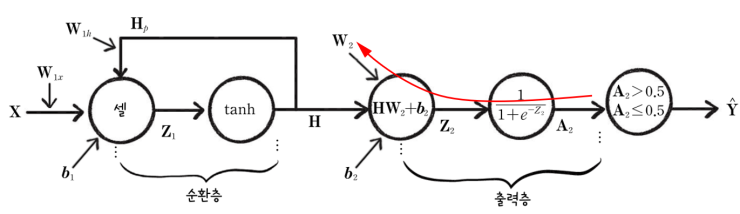

역방향 계산에 대한 자세한 설명은 너무 복잡한 관계로 스킵

# 순환 신경망 구현

먼저 데이터를 변환하고 경사하강법으로 순환 신경망을 구현해보자

In [1]:
# 훈련 세트와 검증 세트를 준비
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17464789/17464789 [==============================] - 0s 0us/step


load_data()에 대해 알아보자  
skip_top은 가장 많이 등장한 단어들 중 건너뛸 단어의 개수이다.  
예를 들어, a, the, is 같은건 많이 쓰지만 내용 파악에는 도움이 되지 않는다.  

</br>

num_words는 훈련에 사용할 단어의 개수를 지정한다.  
메모리 절약을 위해 100으로 지정했다.  


In [3]:
# 훈련 세트의 크기 확인
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
# 훈련 세트 샘플 확인
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


샘플을 확인해보면 영단어가 아닌 정수가 나타난다.  
이 정수들은 영단어를 고유 정수에 1대1 대응한 것으로 BoW 혹은 어휘사전이라고 부른다.  
가장 많이 등장하는 단어 20개를 건너뛰고  
100개의 단어만 선택했기에 사전에 없는 영단어가 많다.  


In [5]:
# 훈련 세트에서 2를 제외
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


2가 정말 많으니 2를 없애주자  
참고로 0과 1은 각각 패딩과 글의 시작을 나타내는데 사용하며  
2는 어휘 사전에 없는 단어다.  
이 숫자들을 제외하고 훈련 세트를 만들자

## 어휘사전 다운로드
어휘사전이 필요하다.  
get_word_index() 함수로 내려받고 이를 테스트 해보자  
테스트할 값은 movie다.  

In [6]:
# 어휘사전 다운로드 및 확인
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

In [7]:
# 훈련세트 정수를 영단어로 변환
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [8]:
# 훈련 샘플 길이 확인
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [9]:
# 훈련 세트의 타깃 데이터 확인
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


이진 분류 문제이기 때문에 긍정(1)인지 부정(0)인지를 나타낸다.

In [10]:
# 검증 세트 준비
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

25000개의 훈련 세트 중 5000개만 분리하여 검증 세트로 사용하자  

이제 샘플 길이를 맞추어야 한다.  
샘플 길이가 너무 길면 샘플을 자르고 너무 짧으면 0으로 채운다.  
여기서, 0일 채울 때는 왼쪽에 채운다.  

In [11]:
# 텐서플로로 샘플 길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [12]:
# 길이 조정한 훈련 세트의 크기와 샘플 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [13]:
# 첫 번째 샘플 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


## 샘플 원-핫 인코딩 하기

In [14]:
# 텐서플로로 원-핫 인코딩하기
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [15]:
# 원-핫 인코딩으로 변환된 x_train_onehot의 크기를 확인
print(x_train_onehot.shape)

(20000, 100, 100)


20,000개의 샘플이 100차원으로 원-핫 인코딩 되었다.

In [16]:
# 용량을 얼마나 먹는지 확인
print(x_train_onehot.nbytes)

800000000


약 760MB, 훈련에 사용할 단어의 개수가 늘어나면 컴퓨터의 메모리가 더 필요하다.  

# 순환 신경망 클래스 구현하기

MiniBatchNetwork 클래스를 기반으로 순환 신경망 구현해보자


In [17]:
# 패키기 임포트
import tensorflow as tf

In [19]:
class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

forpass() 메서드는 정방향 계산, backprop()메서드는 역방향 계산이다.  
  
이 모델로 훈련해보자


In [21]:
# 모델 훈련하기
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

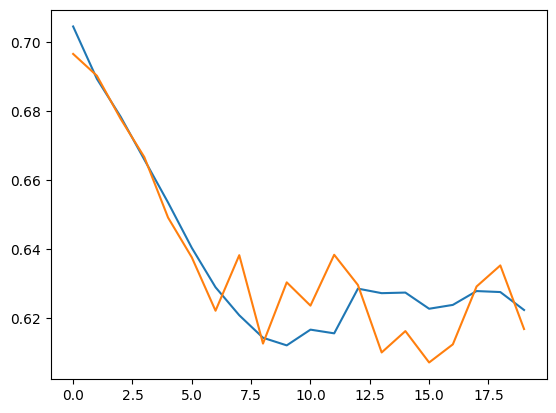

In [22]:
# 훈련, 검증 세트에 대한 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [23]:
# 검증세트로 정확도 평가
rn.score(x_val_onehot, y_val)

0.6594

점수가 꽤 많이 낮다.  
이제 텐서플로로 좀 더 고급 기술을 사용해보자

# 텐서플로로 순환신경망 만들기

SimpleRNN 클래스를 사용해 구현해보자

In [24]:
# 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [25]:
# 모델 만들기
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 24s 36ms/step - loss: 0.7024 - accuracy: 0.5045 - val_loss: 0.6947 - val_accuracy: 0.5196
Epoch 2/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6895 - accuracy: 0.5382 - val_loss: 0.6835 - val_accuracy: 0.5550
Epoch 3/20
625/625 [==============================] - 16s 25ms/step - loss: 0.6725 - accuracy: 0.5809 - val_loss: 0.6767 - val_accuracy: 0.5758
Epoch 4/20
625/625 [==============================] - 15s 24ms/step - loss: 0.6532 - accuracy: 0.6133 - val_loss: 0.6365 - val_accuracy: 0.6426
Epoch 5/20
625/625 [==============================] - 19s 30ms/step - loss: 0.6334 - accuracy: 0.6421 - val_loss: 0.6807 - val_accuracy: 0.5838
Epoch 6/20
625/625 [==============================] - 18s 30ms/step - loss: 0.6212 - accuracy: 0.6585 - val_loss: 0.6104 - val_accuracy: 0.6664
Epoch 7/20
625/625 [==============================] - 20s 31ms/step - loss: 0.6107 - accuracy: 0.6696 - val_loss: 0.6167 - val_accuracy:

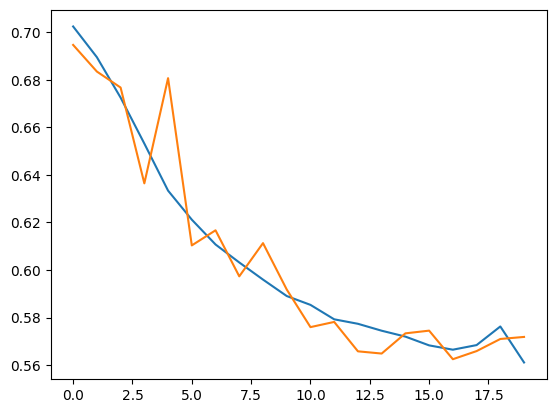

In [27]:
# 훈련, 검증 세트에 대한 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

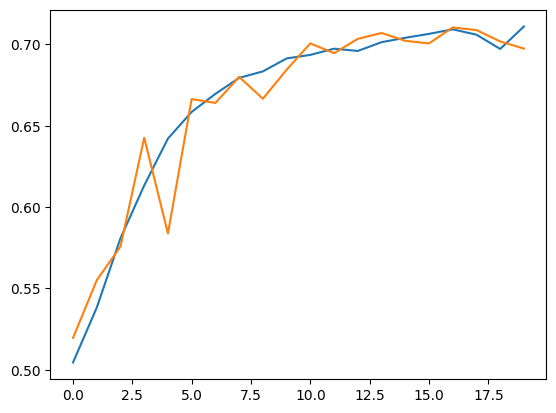

In [28]:
# 훈련, 검증 세트에 대한 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [29]:
# 검증세트 정확도 평가
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6973999738693237


# 임베딩 층으로 순환 신경망 모델 성능 향상

원-핫 인코딩을 하면 입력 데이터 크기와 사용할 수 있는 영단어의 수가 제한된다.  
또한 원-핫 인코딩은 단어 사이에는 관련이 전혀 없다 가정이 전제되어야 한다.  
예를 들어, 원-핫 인코딩은 boy와 girl의 관계를 잘 표현하지 못한다.  

</br>

이를 해결하기 위한 것이 바로 단어 임베딩이다.  
단어 임베딩은 단어를 고정된 길이의 실수 벡터로 임베딩 한다.  
아래 이미지를 참조  

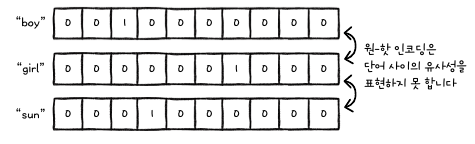

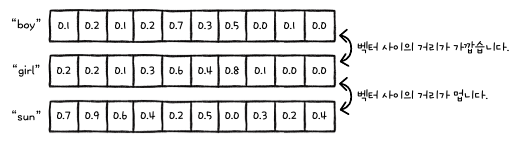

이를 구현해보자

In [30]:
# 패키지 임포트
from tensorflow.keras.layers import Embedding

In [31]:
# 훈련 데이터 준비
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [32]:
# 샘플 길이 맞추기 (크기를 100으로)
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [33]:
# 모델 만들기
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 모델을 컴파일하고 훈련하기
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 21s 32ms/step - loss: 0.4557 - accuracy: 0.8004 - val_loss: 0.4510 - val_accuracy: 0.8014
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 0.4075 - accuracy: 0.8257 - val_loss: 0.4469 - val_accuracy: 0.8008
Epoch 3/10
625/625 [==============================] - 21s 34ms/step - loss: 0.3731 - accuracy: 0.8444 - val_loss: 0.4205 - val_accuracy: 0.8208
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 0.3448 - accuracy: 0.8565 - val_loss: 0.4134 - val_accuracy: 0.8208
Epoch 5/10
625/625 [==============================] - 15s 25ms/step - loss: 0.3049 - accuracy: 0.8804 - val_loss: 0.4147 - val_accuracy: 0.8170
Epoch 6/10
625/625 [==============================] - 17s 26ms/step - loss: 0.2778 - accuracy: 0.8888 - val_loss: 0.4398 - val_accuracy: 0.8234
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2539 - accuracy: 0.9021 - val_loss: 0.4416 - val_accuracy:

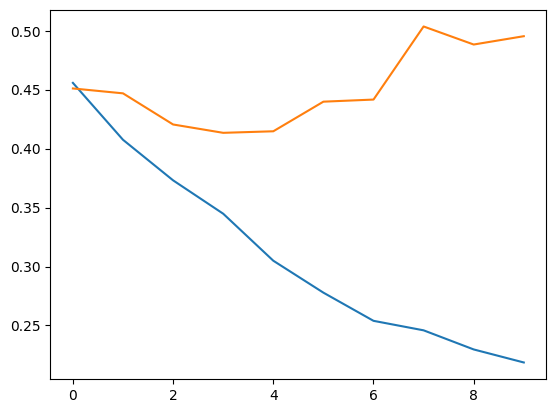

In [36]:
# 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

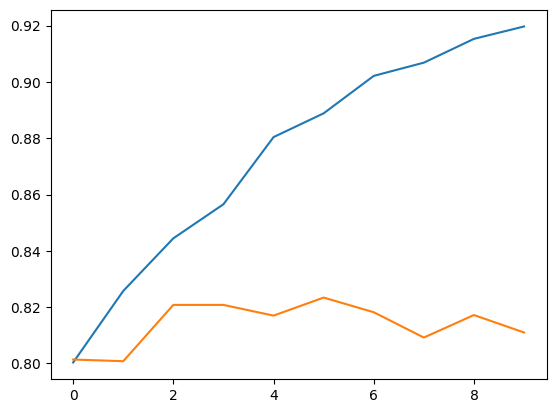

In [37]:
# 정확도 그래프 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [38]:
# 정확도 평가하기
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8109999895095825


# LSTM 순환 신경망을 만들고 텍스트 분류하기
기존 순환 신경망과 달리 LSTM 셀은 2개의 출력이 순환된다.  
그 중 하나만 다음 층으로 전달된다.  
셀로 순환만 되는 출력을 셀 상태라고 한다.  

</br>

셀의 구조는 아래 그림과 같다.

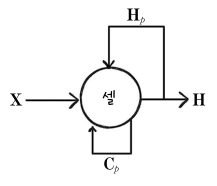